1)About the Project:

Overview:

A spacecraft was transporting almost 13000 passengers to some exoplanets but the spaceship collided with some spacetime anomaly and some passengers were transported to some other dimensions!

Our goal is to predict that whether this passenger will transport to some other dimension or not based on train dataset.

In [2]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 4.8 MB/s eta 0:00:0000:0100:01


In [4]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 5.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 4.2 MB/s eta 0:00:00


In [6]:
!pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 540.0 kB/s eta 0:00:00a 0:00:01


2)importing libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

from imblearn.over_sampling import SMOTE

3)load the dataset

In [2]:
train_df = pd.read_csv('/home/aaranyak/Documents/ml_projects/ml_projects/Spaceship Titanic/train.csv')
test_df = pd.read_csv('/home/aaranyak/Documents/ml_projects/ml_projects/Spaceship Titanic/test.csv')

4)checking the dimensions of data

In [3]:
print("the shape of training dataset")
train_df.shape

the shape of training dataset


(8693, 14)

In [4]:
print("the shape of test dataset")
test_df.shape

the shape of test dataset


(4277, 13)

5)showing training and testing dataset

In [5]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
train_df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [7]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [8]:
test_df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale
4276,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley


6)checking duplicates

In [9]:
print(f"duplicates in train dataset is: {train_df.duplicated().sum()},({100*train_df.duplicated().sum()/len(train_df)})%")

duplicates in train dataset is: 0,(0.0)%


In [10]:
print(f"duplicates in test dataset is: {test_df.duplicated().sum()},({100*test_df.duplicated().sum()/len(test_df)})%")

duplicates in test dataset is: 0,(0.0)%


we can see that we dont have any duplicates in our dataset so there is no data leakage in our project.

7)checking datatypes of train and test dataset

In [11]:
print("datatype of features of train dataset: ")
print(train_df.dtypes)

datatype of features of train dataset: 
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


In [12]:
print("datatype of features of test dataset: ")
print(test_df.dtypes)

datatype of features of test dataset: 
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object


Here it's showing that the cryosleep and the VIP are object type but in table they are of bool values so we have to convert the two features to bool data type while data preprocessing.

8)checking total number and percentage of missing values in training dataset.

In [13]:
df1 = (train_df.isnull().sum()[train_df.isnull().sum()>0]).to_frame().rename(columns={0:"Number of missing values"})
df1["% of missing values"] = round((100*train_df.isnull().sum()[train_df.isnull().sum()>0]/len(train_df)),2)

df1

,Number of missing values,% of missing values
HomePlanet,201,2.31
CryoSleep,217,2.50
Cabin,199,2.29
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11


9)checking total number and percentage of missing values in testing dataset.

In [14]:
df2 = (test_df.isnull().sum()[test_df.isnull().sum()>0]).to_frame().rename(columns={0:"Number of missing values"}) # this is a pandas series.
df2["% of missing values"] = (round((100*test_df.isnull().sum()[test_df.isnull().sum()>0]/len(test_df)),2).values) # this one is a numpy array.

df2

,Number of missing values,% of missing values
HomePlanet,87,2.03
CryoSleep,93,2.17
Cabin,100,2.34
Destination,92,2.15
Age,91,2.13
VIP,93,2.17
RoomService,82,1.92
FoodCourt,106,2.48
ShoppingMall,98,2.29
Spa,101,2.36


we can observe that the % of missing values is very less so we dont need to remove the data but we can just refill it.

10)checking cardinality of categorical columns - unique values.

In [15]:
print("cardinality of categorical features in training dataset")
print(train_df.select_dtypes(include="object").nunique())

cardinality of categorical features in training dataset
PassengerId    8693
HomePlanet        3
CryoSleep         2
Cabin          6560
Destination       3
VIP               2
Name           8473
dtype: int64


In [16]:
print("cardinality of categorical variables in testing dataset")
print(test_df.select_dtypes(include="object").nunique())

cardinality of categorical variables in testing dataset
PassengerId    4277
HomePlanet        3
CryoSleep         2
Cabin          3265
Destination       3
VIP               2
Name           4176
dtype: int64


we can see that PassengerId, Cabin and Name have high cardinaliy and generally we drop variables with high cardinality but in this case we will keep then and do feature engineering on them because more the data then better is the prediction.

Exploratory Data Analysis(EDA)

11)Visualize target feature "transported"

Text(0.5, 1.0, 'Transported feature distribution')

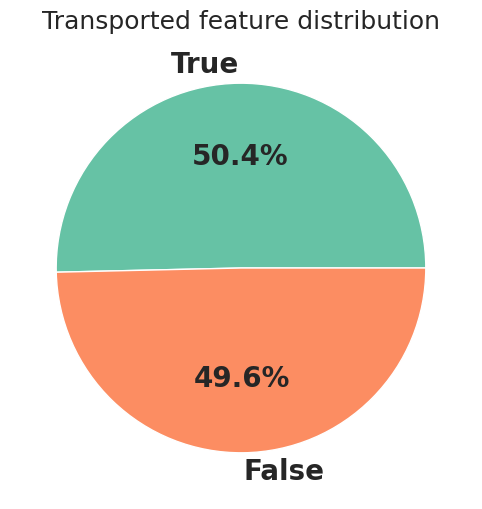

In [17]:
plt.figure(figsize=(10,6))
plt.pie(train_df["Transported"].value_counts(),labels=train_df["Transported"].value_counts().keys(),autopct="%1.1f%%",textprops={"fontsize":20,"fontweight":"black"},colors=sns.color_palette("Set2"))
plt.title("Transported feature distribution") # use histogram because the target feature is binary so its better.

Our feature is highly balanced therefore no need to do over sampling or under sampling.

12)Visualize age feature distribution.

Text(0.5, 1.0, 'Age feature distribution')

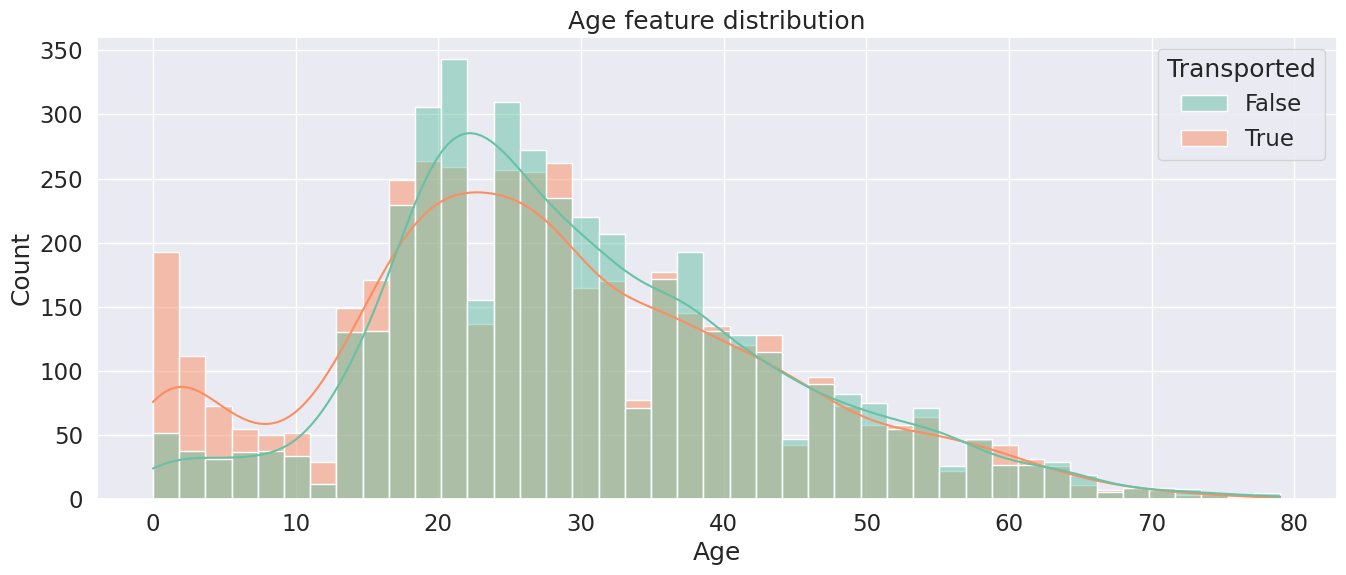

In [18]:
plt.figure(figsize=(16,6))
sns.histplot(x=train_df["Age"],hue="Transported",data=train_df,kde=True,palette="Set2") 
# hue (optional parameter): semantic data key which is mapped to determine the color of plot elements
# Kernel Density Estimation (KDE): It is one of the mechanisms used to smoothen a histogram plot.
plt.title("Age feature distribution")